
# Volume 2: OpenGym



<Name\>Dallin
<Class\>001
<Date\>03/12/2023





In [118]:
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install gym[classic_control]
!pip install gym-toytext

!sudo apt-get install python3.10
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
!sudo update-alternatives --set python3 /usr/bin/python3.10

Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
ModuleNotFoundError: No module named 'pip'
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
ModuleNotFoundError: No module named 'pip'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3.10 is already the newest version (3.10.10-1+focal1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [119]:
import gym
import gym_toytext
import random
import numpy as np
from IPython import display
from matplotlib import pyplot as plt

# Problem 1

*   Implement `random_blackjack()`.
*   Run the game 50,000 times and print the percentage of games that are wins.



In [120]:
# Problem 1
def random_blackjack(n):
    """
    Play a random game of Blackjack. Determine the
    percentage the player wins out of n times.
    Parameters:
        n (int): number of iterations
    Returns:
        percent (float): percentage that the player
                         wins
    """
    # Get Blackjack Environment
    env = gym.make("Blackjack-v1")
    wins = 0

    for i in range(n):
      # Reset the environment
      env.reset()

      while True:
        # Select a random action and take a step using that action
        random_action = env.action_space.sample()
        step = env.step(random_action)
        
        # Get observation, reward and whether the run is done
        observation = step[0]
        reward = step[1]
        done = step[2]
        if done == True:
          break
      
      # Track number of wins
      if reward == True:
        wins += 1

    # Close the environment
    env.close()

    return wins / n

In [121]:
# Run the game here
random_blackjack(50000)

0.28272

# Problem 2

* Implement `blackjack()`.
* For `n` = 1, 2, ..., 21, plot the win percentage after 10,000 games of Blackjack.
* Identify which value of `n` gives the highest win rate.

In [122]:
# Problem 2
def blackjack(n=11):
    """
    Play blackjack with naive algorithm.
    Parameters:
        n (int): maximum accepted player hand
    Return:
        percent (float): percentage of 10000 iterations
                         that the player wins
    """
    # Get Blackjack Environment
    env = gym.make("Blackjack-v1")
    wins = 0

    for i in range(10000):
      # Reset the environment

      done = False
      obs, info = env.reset()
      while not done:
        
        # Determine action based on total value
        if obs[0] < n:
          action = 1
        else: 
          action = 0

        step = env.step(action)
        
        # Get observation, reward and whether the run is done
        obs = step[0]
        reward = step[1]
        done = step[2]
        
      # Track number of wins
      if reward == True:
        wins += 1

    # Close the environment
    env.close()

    return wins / 10000

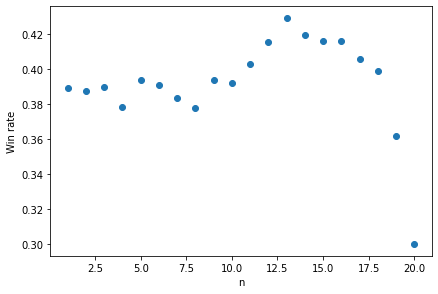

In [123]:
# Plot here
plt.plot(list(range(1,21)), win_rates, 'o')
plt.tight_layout()
plt.ylabel("Win rate")
plt.xlabel("n")
plt.show()

*Identify which value(s) give the highest win-rate here*

# Problem 3

* Implement `cartpole()`.
* Render the game and run your function once.
* Run Cartpole 100 times (without rendering) and print out the average number of steps before it terminates.

In [124]:
# Problem 3
def cartpole(render=False):
    """
    Solve CartPole-v1 by checking the velocity
    of the tip of the pole.
    Parameters: 
        render (bool): If True, render environment at each step
    Return:
        iterations (integer): number of steps or iterations
                              to solve the environment
    """
    # Get Cartpole Environment
    env = gym.make("CartPole-v1", render_mode='rgb_array')

    done = False
    obs, info = env.reset()
    wins = 0

    # Initialize visualization
    if render:
      img = plt.imshow(env.render())  

    while not done:

      # Determine whether to push left or right
      if obs[3] <= 0:
        action = 0
      else:
        action = 1

      step = env.step(action)
        
      # Get observation, reward and whether the run is done
      obs = step[0]
      reward = step[1]
      done = step[2]

      # Update visualization
      if render:
        img.set_data(env.render())
        display.display(plt.gcf())
        display.clear_output(wait=True)
        
      # Track number of wins
      if reward == True:
        wins += 1

    # Close the environment
    env.close()

    return wins

145

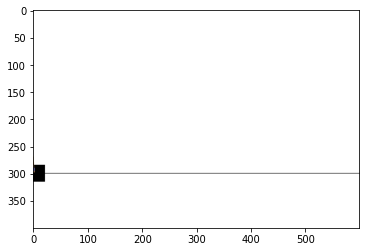

In [125]:
# Render the game and run once here
cartpole(True)

In [126]:
# Run the game here and print average steps to termination
print(np.mean([cartpole() for _ in range(100)]))

198.66


# Problem 4

* Implement `car()`.
* Render the game and run your function once.
* Run MountainCar 100 times (without rendering) and print out the average number of steps before it terminates.

In [127]:
# Problem 4
def car(render=False):
    """
    Solve MountainCar-v0 by checking the position
    of the car.
    Parameters: 
        render (bool): If True, render environment at each step
    Return:
        iterations (integer): number of steps or iterations
                              to solve the environment
    """
    # Get Cartpole Environment
    env = gym.make("MountainCar-v0", render_mode='rgb_array')

    done = False
    obs, info = env.reset()
    iters = 0

    # Initialize visualization
    if render:
      img = plt.imshow(env.render())  

    while not done:

      # Determine whether to push left or right
      if obs[1] >= 0:
        action = 2
      else:
        action = 0

      step = env.step(action)
        
      # Get observation, reward and whether the run is done
      obs = step[0]
      reward = step[1]
      done = step[2]

      # Update visualization
      if render:
        img.set_data(env.render())
        display.display(plt.gcf())
        display.clear_output(wait=True)
        
      iters += 1

    # Close the environment
    env.close()

    return iters

121

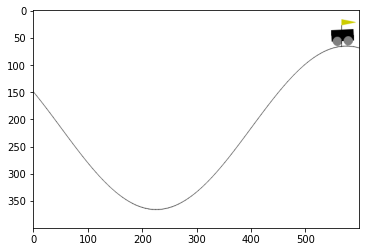

In [128]:
# Render the game here
car(True)

In [129]:
# Run the game here and print average steps to termination
print(np.mean([car() for _ in range(100)]))

119.29


## Helper Function for Problem 5

In [130]:
def find_qvalues(env,alpha=.1,gamma=.6,epsilon=.1):
    """
    Use the Q-learning algorithm to find qvalues.
    Parameters:
        env (str): environment name
        alpha (float): learning rate
        gamma (float): discount factor
        epsilon (float): maximum value
    Returns:
        q_table (ndarray nxm)
    """
    # Make environment
    env = gym.make(env)
    # Make Q-table
    q_table = np.zeros((env.observation_space.n, env.action_space.n))

    # Train
    for i in range(1,100001):
        # Reset state
        state, info = env.reset()

        epochs, penalties, reward, = 0,0,0
        done = False

        while not done:
            # Accept based on alpha
            if random.uniform(0,1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state])

            # Take action
            next_state, reward, done, truncated, info = env.step(action)

            # Calculate new qvalue
            old_value = q_table[state,action]
            next_max = np.max(q_table[next_state])

            new_value = (1-alpha) * old_value + alpha * (reward + gamma * next_max)
            q_table[state, action] = new_value

            # Check if penalty is made
            if reward == -10:
                penalties += 1

            # Get next observation
            state = next_state
            epochs += 1

        # Print episode number
        if i % 100 == 0:
            display.clear_output(wait=True)
            print(f"Episode: {i}")

    print("Training finished.")
    return q_table

# Problem 5

* Initialize the "`Taxi-v3`" environment (without rendering), act randomly until it terminates, and print the total reward
* Render the "`Taxi-v3`" environment, use the Q-table to act optimally until it terminates, and print the total reward
* Implement `taxi()`, then use it to print the average total reward for each algorithm.


In [143]:
# Random actions Taxi game

# Get Taxi-v3 Environment
def random_taxi():
  env = gym.make("Taxi-v3", render_mode='rgb_array')

  done = False
  obs, info = env.reset()
  wins = 0
  state = list(env.decode(obs))

  while not done:

    # Get a random action
    action = env.action_space.sample()

    step = env.step(action)
      
    # Get observation, reward and whether the run is done
    obs = step[0]
    reward = step[1]
    done = step[2]
    info = step[4]

    state = list(env.decode(obs))
      
    wins += reward

  # Close the environment
  env.close()

  return wins

In [144]:
random_taxi()

-1619

In [132]:
# Q-table actions Taxi game
q_values = find_qvalues("Taxi-v3")

Episode: 100000
Training finished.


In [147]:
# Get Taxi-v3 Environment and use Q-table

def q_taxi(q_values, render=False): 
  env = gym.make("Taxi-v3", render_mode='rgb_array')

  done = False
  obs, info = env.reset()
  wins = 0
  state = list(env.decode(obs))

  # Initialize visualization
  if render == True:
    img = plt.imshow(env.render())

  while not done:

    # Get a random action
    action = np.argmax(q_values[obs, :])

    step = env.step(action)
      
    # Get observation, reward and whether the run is done
    obs = step[0]
    reward = step[1]
    done = step[2]
    info = step[4]

    state = list(env.decode(obs))
      
    wins += reward

    # Update visualization
    if render == True:
      img.set_data(env.render())
      display.display(plt.gcf())
      display.clear_output(wait=True)

  # Close the environment
  env.close()

  return wins

11

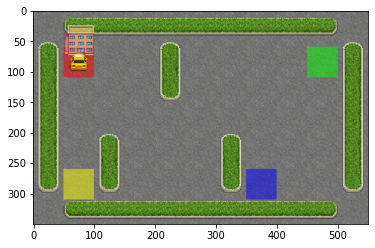

In [148]:
q_taxi(q_values, True)

In [145]:
def taxi(q_table):
    """
    Compare naive and q-learning algorithms.
    Parameters:
        q_table (ndarray nxm): table of qvalues
    Returns:
        naive (float): mean reward of naive algorithm
                       of 1000 runs
        q_reward (float): mean reward of Q-learning algorithm
                          of 1000 runs
    """
    naive = np.mean([random_taxi() for _ in range(1000)])
    q_reward = np.mean([q_taxi(q_values) for _ in range(1000)])
    return naive, q_reward

In [149]:
# Print the average rewards of the Taxi game for both algorithms run 1000 times
naive, q_reward = taxi(q_values)
print(f"Average Naive: {naive}")
print(f"Average q_reward: {q_reward}")

Average Naive: -9850.497
Average q_reward: 8.091
